# Without sWeights: `common_B0TODst3pi_Dst_constr_BDT-1.25`

Check the $m(D^*)$ distribution after optimisation

In [30]:
name_data = 'common_B0TODst3pi_Dst_constr'
name_BDT = 'gradient'
name_data_MC = 'MC_constr_opposedCB_sharedMean'

BDT = -1.25

name_data_BDT = name_data + f'_BDT{BDT}'

In [7]:
var = 'Dst_constr_B0_M'
low = 5150.
high = 5545.

## Import

In [3]:
import zfit
import json
import numpy as np
import timeit

from numpy.random import normal

from math import sqrt

from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets

import sys
sys.path.append(loc.SCRIPTS)

from load_save_data import load_saved_root, load_data, add_constr_Dst, json_to_latex_table, retrieve_params, format_previous_params
import plot.histogram as h
from plot.fit import plot_hist_fit_particle
from fit import define_zparams, sum_crystalball
from variables import name_params, name_params_KPiPi

Welcome to JupyROOT 6.22/02


## Load

In [5]:
df= {}

In [22]:
df['common'] = load_saved_root('common_'+name_BDT, name_folder='common', vars=['B0_M', 'Dst_M', 'BDT'])
df['common_opt'] = df['common'].query(f"BDT > {BDT}")

/afs/cern.ch/user/c/correian/bd2dst3pi/output//root/common/common_gradient.root


In [23]:
df['MC'] = load_data(years, magnets, 'MC', vars = ['B0_M', 'Dst_M'])
df['MC'] = add_constr_Dst(df['MC'])

/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_up_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_down_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_up_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_down_Sim09e-ReDecay01.root


## PLOT

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_B0TODst3pi_Dst_constr_BDT-1.25/Dst_M_LHCb_data_LHCb_data_with_BDT>-1.25


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($D^*$) [MeV/$c^2$]', ylabel='Candidates / (0.848 MeV/$c^2$)'>)

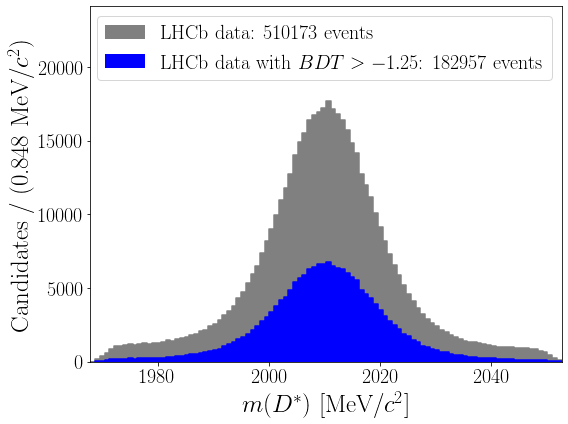

In [29]:
h.plot_hist_particle({'LHCb data': df['common'], 'LHCb data with $BDT>-1.25$': df['common_opt']}, 'Dst_M', 
                     mode_hist=True, colors=['grey', 'blue'], density=False, alpha=1,
                     name_folder=name_data_BDT)

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_B0TODst3pi_Dst_constr_BDT-1.25/Dst_M_MC


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($D^*$) [MeV/$c^2$]', ylabel='Candidates / (0.811 MeV/$c^2$)'>)

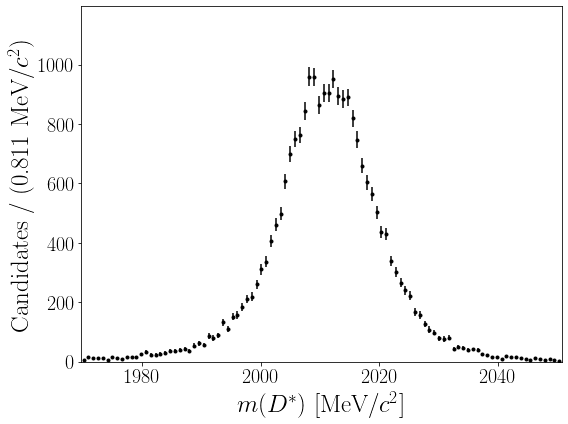

In [15]:
h.plot_hist_particle({'MC': df['MC']}, 'Dst_M', 
                     mode_hist=False, colors='black',
                     name_folder=name_data_BDT)

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_B0TODst3pi_Dst_constr_BDT-1.25/Dst_M_LHCb_data_with_BDT>-1.25_MC


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($D^*$) [MeV/$c^2$]', ylabel='Proportion of candidates / (0.842 MeV/$c^2$)'>)

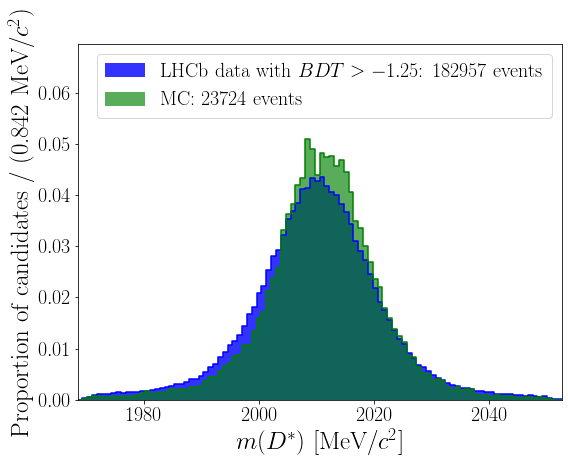

In [21]:
h.plot_hist_particle({'LHCb data with $BDT>-1.25$': df['common'], 'MC': df['MC']}, 'Dst_M', 
                     mode_hist=True, colors=['blue', 'green'],
                     name_folder=name_data_BDT, alpha=[0.8,0.65])